In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
%matplotlib inline

In [29]:
sns.set_theme(style="white",
              font_scale=1.7)

df1=pd.read_csv("C:/Users/alraw/Documents/COSC301/survey.csv")
df1

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [4]:
df1.describe(exclude=[np.object]).T

C:\Users\alraw\AppData\Local\Temp/ipykernel_30432/3785358294.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df1.describe(exclude=[np.object]).T


,count,mean,std,min,25%,50%,75%,max
Age,1259.0,7.942815e+07,2.818299e+09,-1726.0,27.0,31.0,36.0,1.000000e+11


In [5]:
df1.describe(exclude=[np.number]).T

,count,unique,top,freq
Timestamp,1259,1246,2014-08-27 12:44:51,2
Gender,1259,49,Male,615
Country,1259,48,United States,751
state,744,45,CA,138
self_employed,1241,2,No,1095
family_history,1259,2,No,767
treatment,1259,2,Yes,637
work_interfere,995,4,Sometimes,465
no_employees,1259,6,6-25,290
remote_work,1259,2,No,883


In [6]:
df2=df1.drop(columns=['state','self_employed','work_interfere','coworkers','supervisor','mental_vs_physical','anonymity','obs_consequence','mental_health_interview','care_options','phys_health_interview','comments'])
df2

,Timestamp,Age,Gender,Country,family_history,treatment,no_employees,remote_work,tech_company,benefits,wellness_program,seek_help,leave,mental_health_consequence,phys_health_consequence
0,2014-08-27 11:29:31,37,Female,United States,No,Yes,6-25,No,Yes,Yes,No,Yes,Somewhat easy,No,No
1,2014-08-27 11:29:37,44,M,United States,No,No,More than 1000,No,No,Don't know,Don't know,Don't know,Don't know,Maybe,No
2,2014-08-27 11:29:44,32,Male,Canada,No,No,6-25,No,Yes,No,No,No,Somewhat difficult,No,No
3,2014-08-27 11:29:46,31,Male,United Kingdom,Yes,Yes,26-100,No,Yes,No,No,No,Somewhat difficult,Yes,Yes
4,2014-08-27 11:30:22,31,Male,United States,No,No,100-500,Yes,Yes,Yes,Don't know,Don't know,Don't know,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,No,Yes,26-100,No,Yes,No,No,No,Somewhat easy,No,No
1255,2015-09-26 01:07:35,32,Male,United States,Yes,Yes,26-100,Yes,Yes,Yes,No,No,Somewhat difficult,No,No
1256,2015-11-07 12:36:58,34,male,United States,Yes,Yes,More than 1000,No,Yes,Yes,No,No,Somewhat difficult,Yes,Yes
1257,2015-11-30 21:25:06,46,f,United States,No,No,100-500,Yes,Yes,No,No,No,Don't know,Yes,No


In [8]:
df3=df2.dropna(subset=['family_history','no_employees', 'remote_work','mental_health_consequence','phys_health_consequence'])
df3

,Timestamp,Age,Gender,Country,family_history,treatment,no_employees,remote_work,tech_company,benefits,wellness_program,seek_help,leave,mental_health_consequence,phys_health_consequence
0,2014-08-27 11:29:31,37,Female,United States,No,Yes,6-25,No,Yes,Yes,No,Yes,Somewhat easy,No,No
1,2014-08-27 11:29:37,44,M,United States,No,No,More than 1000,No,No,Don't know,Don't know,Don't know,Don't know,Maybe,No
2,2014-08-27 11:29:44,32,Male,Canada,No,No,6-25,No,Yes,No,No,No,Somewhat difficult,No,No
3,2014-08-27 11:29:46,31,Male,United Kingdom,Yes,Yes,26-100,No,Yes,No,No,No,Somewhat difficult,Yes,Yes
4,2014-08-27 11:30:22,31,Male,United States,No,No,100-500,Yes,Yes,Yes,Don't know,Don't know,Don't know,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,No,Yes,26-100,No,Yes,No,No,No,Somewhat easy,No,No
1255,2015-09-26 01:07:35,32,Male,United States,Yes,Yes,26-100,Yes,Yes,Yes,No,No,Somewhat difficult,No,No
1256,2015-11-07 12:36:58,34,male,United States,Yes,Yes,More than 1000,No,Yes,Yes,No,No,Somewhat difficult,Yes,Yes
1257,2015-11-30 21:25:06,46,f,United States,No,No,100-500,Yes,Yes,No,No,No,Don't know,Yes,No


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import sys
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline

from scripts import project_functions
df=project_functions.load_and_process('../../data/raw/mentalhealthintech.csv')
df

,Timestamp,Age,Gender,Country,family_history,treatment,no_employees,remote_work,tech_company,benefits,wellness_program,seek_help,leave,mental_health_consequence,phys_health_consequence
0,8/27/2014 11:29,37,F,United States,No,Yes,25-Jun,No,Yes,Yes,No,Yes,Somewhat easy,No,No
1,8/27/2014 11:29,44,M,United States,No,No,More than 1000,No,No,Don't know,Don't know,Don't know,Don't know,Maybe,No
2,8/27/2014 11:29,32,M,Canada,No,No,25-Jun,No,Yes,No,No,No,Somewhat difficult,No,No
3,8/27/2014 11:29,31,M,United Kingdom,Yes,Yes,26-100,No,Yes,No,No,No,Somewhat difficult,Yes,Yes
4,8/27/2014 11:30,31,M,United States,No,No,100-500,Yes,Yes,Yes,Don't know,Don't know,Don't know,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,9/12/2015 11:17,26,M,United Kingdom,No,Yes,26-100,No,Yes,No,No,No,Somewhat easy,No,No
1255,9/26/2015 1:07,32,M,United States,Yes,Yes,26-100,Yes,Yes,Yes,No,No,Somewhat difficult,No,No
1256,11/7/2015 12:36,34,M,United States,Yes,Yes,More than 1000,No,Yes,Yes,No,No,Somewhat difficult,Yes,Yes
1257,11/30/2015 21:25,46,F,United States,No,No,100-500,Yes,Yes,No,No,No,Don't know,Yes,No


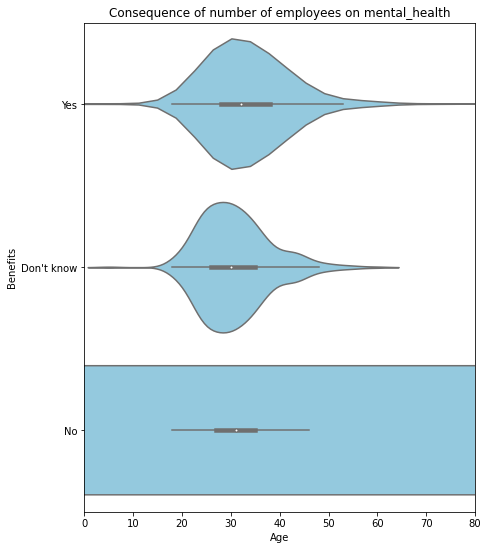

In [25]:
#Graph 1
plt.figure(figsize=(7,9))
v1=sns.violinplot(x='Age',y='benefits',data=df,scale="width",color="skyblue")
v1.set_xlim(0,80)
plt.title('Consequence of number of employees on mental_health')
plt.xlabel('Age')
plt.ylabel('Benefits')

plt.show()

In [ ]:
#The Aanalysis shown above shows that older employees tend to recieve benfits than those younger which could be a reson why older people may sometimes be less likely to have work have a mental consequence on them.  

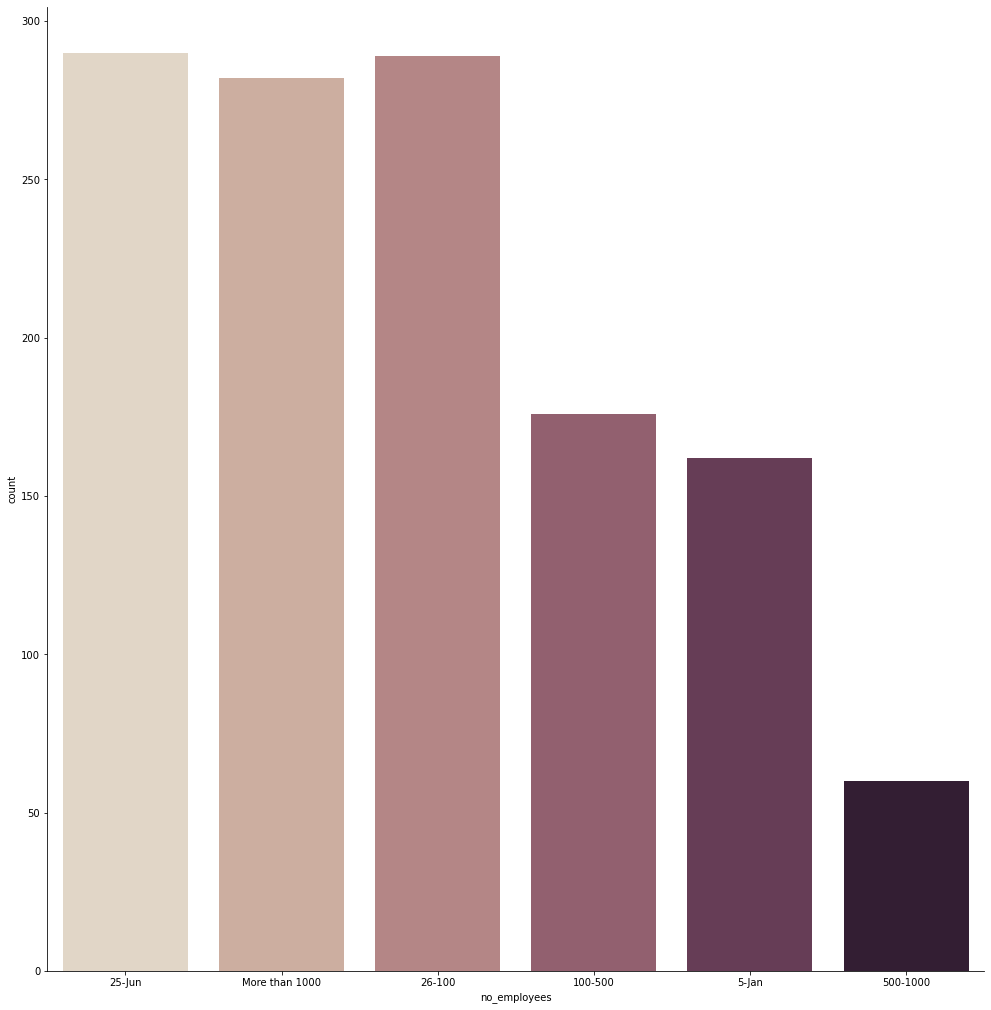

In [21]:

df1=df[["no_employees","mental_health_consequence"]]
v2=sns.catplot(x="no_employees", kind="count", palette="ch:.25", data=df1)
v2.fig.set_size_inches(15,15)
#

In [23]:
#From hear we can see that most companies tend to have a number of employees that ranges from 0 to 1000. There is a possiblility that by lowering the number of employees, the less chance there would be a mental consequence on employees. 

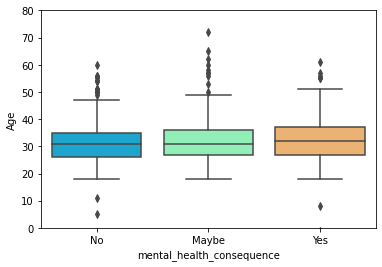

In [12]:
#df2=df[["Age","mental_health_consequence"]]
v3=sns.boxplot(x='mental_health_consequence',y='Age',data=df,palette='rainbow')
v3.set_ylim(0,80)
plt.show()


In [ ]:
#This shows that older aged employees are more likely to develop mental issues than younger people. 

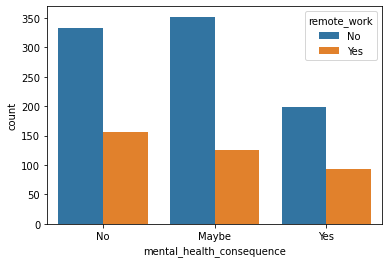

In [16]:
#Grpah 4
v4 = sns.countplot(x="mental_health_consequence", hue="remote_work", data=df)

In [ ]:
#There seems to be no correlation between wotking remotly and there being a chance of developing mental issues. 

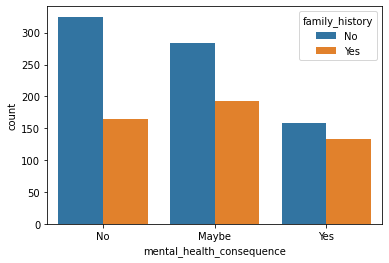

In [17]:
#Grpah 5
v5 = sns.zcountplot(x="mental_health_consequence", hue="family_history", data=df)

In [ ]:
#Employees with a family histroy of a mental consequence can also develop mental health issue but it is not the case most of the time. 

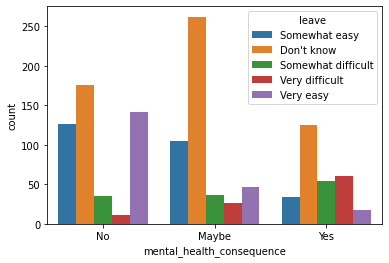

In [19]:
#Grpah 6
v5 = sns.countplot(x="mental_health_consequence", hue="leave", data=df)

In [ ]:
#This shows that employees that do take a leave are less likely to develop mental health issues compared to employees that do not take a leave. 

In [ ]:
#Research Conclusion
 
# Based of from the analysis carried out obove it is fair two say that the biggest factors that affect there being a consequence on an employees mental
# health are, comapnies that have larger number of employees, employee age and family history. This is     